In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# There's a lot of columns in the DF. 
# Therefore, we add this option so that we can see more columns
pd.options.display.max_columns = 100

# Data Preprocessing

In this notebook, we will perform some cleaning and analysis of the data before applying the Machine Learning algorithm. 

First, let us load the data.

In [2]:
df = pd.read_csv('./Data/CrowdstormingDataJuly1st.csv')
df.head(10)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


The data description, which is the `Data.md` file in the `Data` folder, tells us that we are working on 
> a dataset of player–referee dyads including the number of matches players and referees encountered each other and our dependent variable, the number of red cards given to a player by a particular referee throughout all matches the two encountered each other.

A dyad between a player and a referee simply means the interaction between a player and a referee. 


## 1. Cleaning the NaNs values for the colours of players

We want to see the number of entries in the Dataframe before starting to clean the DataFrame.

In [3]:
df_size_init = df.shape
print(df_size_init)

(146028, 28)


The first step we want to take is to remove all the players from which the skin column was not identified, i.e. the ones who have NaN entries in the *rater1* and *rater2* columns, which measures the darkness of the skin color.

In [4]:
df = df.dropna(subset=['rater1', 'rater2'])
print(df.shape)

(124621, 28)


We see now that we dropped already quite some entries.

In [5]:
df_size_init[0] - df.shape[0]

21407

In [6]:
# Check for other null values
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID          False
rater1           False
rater2           False
refNum           False
refCountry       False
Alpha_3           True
meanIAT           True
nIAT              True
seIAT             True
meanExp           True
nExp              True
seExp             True
dtype: bool

There are still quite few entries that have null values, and we want to assess if they are correlated in any fashion.

In [7]:
print(df[df['meanIAT'].isnull()].shape)
print(df[df['meanExp'].isnull()].shape)

(153, 28)
(153, 28)


We see first that there is exactly the same number of entries having NaN *meanIAT* and *meanExp* entries, and we see below that

In [8]:
df[df['meanExp'].isnull()].refNum.unique()

array([  19,   23,  335,  883, 1352, 1650, 1789, 1802, 1974, 2272, 2457])

We see that there are only a few referees (the names are not here for anonymization purposes), that have NaN entries in both field. Let's just remove the them from our dataset.

In [9]:
df = df[~df['meanIAT'].isnull()]
print(df.isnull().any())
print(df.shape)

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height            True
weight            True
position          True
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID          False
rater1           False
rater2           False
refNum           False
refCountry       False
Alpha_3          False
meanIAT          False
nIAT             False
seIAT            False
meanExp          False
nExp             False
seExp            False
dtype: bool
(124468, 28)


We can see here that there are still some columns with NaN entries, which we will deal with later on.

## 2. Uniquely defining the skin column : creating a `skin_colour` column

We define the skin_colour column as the mean of the *rater1* and *rater2* columns. They are described as the following  :

>rater1 - skin rating of photo by rater 1 (5-point scale ranging from “very light skin” to “very dark skin”)

>rater2 - skin rating of photo by rater 2 (5-point scale ranging from “very light skin” to “very dark skin”).

As both describe the same thing with different scales, it is sensible to average them. We then remove the *rater1* and *rater2* columns, as they will not be of use for us anymore. 

In [10]:
df['skin_colour'] = df[['rater1', 'rater2']].mean(axis=1)
df = df.drop(['rater1', 'rater2'], axis=1)
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin_colour
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


Let us quickly check all the different `skin_colour` values that a player can have.

In [11]:
unique_colours = df['skin_colour'].unique()
np.sort(unique_colours)

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ])

We see the 5 values that were initially given by the *rater1* and *rater2* columns, along with the values inbetween those, leading us to a grand total of 9 different entries (still from “very light skin” to “very dark skin”)

## 3. Removing some more features

There are many columns that do not convey useful information to our purpose, we want to identify and remove them.

In [12]:
print(df.columns)

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'refNum',
       'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp',
       'seExp', 'skin_colour'],
      dtype='object')


There are some very obvious entries that are of no use to us : 
- *photoID*: We do not have the pictures !
- *refNum*: We will aggregate the values by the name of the player, so we do not need it.
- *refCountry*: We do not need it for the same reason.
- *Alpha_3*: We do not need it for the same reason.

The following features only are related to a referee, and we will remove them as well.
- *meanIAT*
- *nIAT*
- *seIAT*
- *meanExp*
- *nExp*
- *seExp*

**N.B.** We are doing this as the aim of the exercise is to determine the skin colour of a player from the stats we have on him. His skin colour should not depend on the referee present in his matches ;)

In [13]:
columns_to_remove = ['photoID', 'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp']
df_cleaned = df.drop(columns_to_remove, axis=1)

In [14]:
print(df_cleaned.shape)
df_cleaned.head(10)

(124468, 17)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,skin_colour
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0,0,0,0,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0,0,0,0,0.000
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,0,0,0,1,0,0,0.000
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,0,0,0,0,0,0,0.500
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,0,0,0,0,0,0,0.000


We did not change the number of entries here, but now only have 17 columns remaining. The following transformation is to get all the data related to each player, i.e. aggregate by their name.

## 4. Aggregating the table

The number of unique `player` entries is our database is way smaller than the total number of entries !

In [15]:
print("Total number of players: ", len(df_cleaned['player'].unique()))

Total number of players:  1572


This means that have extensive data on a few players, as they played many matches in their career. We will now perform the aggregation of our data.

In [16]:
unique_players = df_cleaned['player'].unique()

Let us create the DataFrame in which we'll store our unique player entries. 

In [17]:
# Values on whichc we want to sum
summed = ['games', 'victories', 'ties', 'defeats', 'goals', 
         'yellowCards', 'yellowReds', 'redCards']
#Dirty trick to keep the NaNs in the groupby because there is no other was to do so (opened issue in the project)
df_players = df_cleaned.replace(np.nan, -1000).groupby(['playerShort', 'player' ,'club' ,'leagueCountry', 'birthday', 'height', 'weight','position','skin_colour'])
df_players = df_players[summed].sum()
df_players = df_players.reset_index().replace(-1000, np.NaN)
print(df_players.shape)

df_players_no_nan = df_players.dropna()
print(df_players_no_nan.shape)

df_players.head()

(1585, 17)
(1419, 17)


,playerShort,player,club,leagueCountry,birthday,height,weight,position,skin_colour,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
0,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,0.125,654,247,179,228,9,19,0,0
1,aaron-hunt,Aaron Hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,0.125,336,141,73,122,62,42,0,1
2,aaron-lennon,Aaron Lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,0.250,412,200,97,115,31,11,0,0
3,aaron-ramsey,Aaron Ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.000,260,150,42,68,39,31,0,1
4,abdelhamid-el-kaoutari,Abdelhamid El-Kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,0.250,124,41,40,43,1,8,4,2


We see here that if we don't keep the NaNs, we lose many players in the process. We want to see whether it is justified to do so. We computed all the players which are exluded of our newer DataFrame. First of all, we just want to note that that there are a few players who have the same name, so the sorting by the *playerShort* attribute will yield unique results. One such example is the following :

In [18]:
#Check whether the entries are unique for the playerShort attribute
print(len(df_players.playerShort) - len(df_players.playerShort.unique()))

#Check whether the entries are unique for the player attribute
print(len(df_players.player) - len(df_players.player.unique()))

df_players.loc[df_players.player == ' Juanfran']

0
13


,playerShort,player,club,leagueCountry,birthday,height,weight,position,skin_colour,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
790,juanfran,Juanfran,Levante UD,Spain,15.07.1976,183.0,78.0,Left Fullback,0.375,487,207,127,153,10,121,7,8
791,juanfran_2,Juanfran,Atlético Madrid,Spain,09.01.1985,180.0,72.0,Right Fullback,0.000,366,164,89,113,19,61,1,1
792,juanfran_4,Juanfran,Real Madrid,Spain,11.09.1988,179.0,72.0,Right Winger,0.625,92,31,18,43,4,5,0,0


Let us now focus on the players which were excluded from the aggregation. There are three distinct cases for the exclusion of players from the DataFrame, as we show below. Either
- the player has no *weight* entry,
- the player has no *position* entry,
- the player has no *height* entry,
- or it can be a combination of those. 

Let us show a player with no *position entry*.

Here we have a player with both no *weight*, no *height* and no *position* !

In [19]:
df_players.loc[df_players['height'].isnull()]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,skin_colour,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards
484,filip-malbasic,Filip Malbašić,1899 Hoffenheim,Germany,18.11.1992,NaN,NaN,Left Winger,0.25,58,29,12,17,6,8,0,1
705,jerome-sinclair,Jerome Sinclair,Liverpool FC,England,20.09.1996,NaN,NaN,NaN,0.75,1,1,0,0,0,0,0,0
892,loic-abenzoar,Loïc Abenzoar,Olympique Lyon,France,14.02.1989,NaN,NaN,Right Fullback,0.75,12,0,3,9,0,2,0,0


We see that removing them is the simplest approach we can take, but let us first check the percentage of the population that they represent. 

In [20]:
print("Percentage of people removed with the aggregation: ", 100*(1-df_players_no_nan.shape[0]/len(df_cleaned.playerShort.unique())), "%")

Percentage of people removed with the aggregation:  10.473186119873812 %


Even if they represent 10% of our population, we can remove them as including them in the Machine Learning process would yield many complications, having to create special cases for each of the missing data. We will however keep them in a separate DataFrame for comparison's sake.

We also discretise the country in which they're playing and the birthYear in order to be able to use it in our algrithm, as it only takes numeric values.

In [21]:
df_players['english'] = [int(country == 'England') for country in df_players['leagueCountry']]
df_players['german'] = [int(country == 'Germany') for country in df_players['leagueCountry']]
df_players['french'] = [int(country == 'France') for country in df_players['leagueCountry']]
df_players['spanish'] = [int(country == 'Spain') for country in df_players['leagueCountry']]
df_players['birthYear'] = [int(b[-4:]) for b in df_players['birthday']]


We now save these DataFrames, making sure before that there are no more NaNs in our data.

In [22]:
print(df_players_no_nan.isnull().any())

#actualise the value of the DataFrame
df_players_no_nan = df_players.dropna()

df_players.to_csv('./Data/players.csv', index=False)
df_players_no_nan.to_csv('./Data/players_no_nan.csv', index=False)

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height           False
weight           False
position         False
skin_colour      False
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
dtype: bool


We will also save the dataFrames with only the numeric features.

In [23]:
non_numeric = ['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'position']
df_players.drop(non_numeric, axis=1).to_csv('./Data/players_num_values.csv', index=False)
df_players_no_nan.drop(non_numeric, axis=1).to_csv('./Data/players_no_nan_only_num_values.csv', index=False)

## 5. Cross-Featuring

We can introduce some cross-features with the features we removed. We know for example that the columns with
- **IAT** refer to the **race IAT test**, *i.e.* a high value correspond to someone who will prefer a white person (thinks it's a better person) over a black person.
- **Exp** refer to the use of a **racial thermometer task**, *i.e.* a high value corresponds to greater feelings of warmth toward whites versus blacks.

If we want to keep these information, we can cross-feature those information with the yellow and red cards given to the player . 

Let's introduce a **new variable**. We will call it the `gravity_factor`. It is given by:


\begin{equation}
G = Y + \frac{\sum Y}{\sum YR}  YR + \frac{\sum Y }{\sum R} R
\end{equation}
where:
- $Y$ is the number of yellow cards given to a player
- $\sum Y$ is the total number of yellow cards given to all players
- $YR$ is the number of yellow then red cards given to a player
- $\sum YR$ is the total number of yellow then red cards given to all players
- $R$ is the number of red cards given to a player
- $\sum R$ is the total number of red cards given to all players

Note that $\frac{\sum Y}{\sum YR}$ and $\frac{\sum Y}{\sum R}$ is giving a weight > 1 to the gravity of the card.
This has been done in order to minize the bias if the player has hardly encounter the refery


So, let's add this new value to the big DF.

In [24]:
print("Percentage of yellow cards: ", 100*df['yellowCards'].sum()/
      df['games'].sum(), "%")
print("Percentage of yellow then red cards: ", 100*df['yellowReds'].sum()/
      df['games'].sum(), "%")
print("Percentage of red cards: ", 100*df['redCards'].sum()/
      df['games'].sum(), "%")

Percentage of yellow cards:  13.33592576700279 %
Percentage of yellow then red cards:  0.4030787384681399 %
Percentage of red cards:  0.4261424586998498 %


- here we calculate the number $Y$,$YR$,$R$

In [25]:
nbr_yellow = df['yellowCards'].sum()
nbr_yellowRed = df['yellowReds'].sum()
nbr_red = df['redCards'].sum()

- next we calculate the gravity with the previous formula

In [26]:
gravity = df['yellowCards'] + nbr_yellow/nbr_yellowRed * df['yellowReds'] + nbr_yellow/nbr_red * df['redCards']
gravity.unique()

array([   0.        ,    1.        ,   31.29452486,   33.08516301,
         32.29452486,    2.        ,    4.        ,    3.        ,
         35.08516301,   34.08516301,   34.29452486,    5.        ,
         38.08516301,   36.08516301,   11.        ,   71.17032601,
          6.        ,    8.        ,   43.08516301,   33.29452486,
         42.08516301,   69.37968787,    7.        ,   35.29452486,
         37.08516301,   40.08516301,   39.08516301,  111.46485087,
         65.37968787,   66.17032601,   38.29452486,   67.37968787,
        101.25548902,   36.29452486,   62.58904972,   66.37968787,
         64.37968787,   64.58904972,   67.17032601,    9.        ,
         68.17032601,   69.17032601,   70.17032601,   74.37968787,
         70.37968787,   37.29452486,   10.        ,   68.58904972,
         71.37968787,  101.67421272,   41.08516301,   63.58904972,
         99.67421272,   40.29452486,   39.29452486,   99.25548902,
         73.37968787,   44.08516301,   66.58904972,   46.08516

- next we simply create a new data frame adding the gravity to *df*
- done only in order to visualize if the gravity is working

In [27]:
df_with_features = df
df_with_features['gravity'] = gravity
df_with_features.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin_colour,gravity
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375,0.0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750,1.0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0,0,0,0,3868.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0.0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0.0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000,0.0


- same as before but this time using the agregated data with unique entry for each player to obtain the actual gravity 
for each player

In [28]:
gravity_players = df_players['yellowCards'] + nbr_yellow/nbr_yellowRed * df_players['yellowReds'] + nbr_yellow/nbr_red * df_players['redCards']

In [29]:
df_players_with_features = df_players
df_players_with_features['gravity'] = gravity_players
df_players_with_features.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,skin_colour,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,english,german,french,spanish,birthYear,gravity
0,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,0.125,654,247,179,228,9,19,0,0,1,0,0,0,1979,19.000000
1,aaron-hunt,Aaron Hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,0.125,336,141,73,122,62,42,0,1,0,1,0,0,1986,73.294525
2,aaron-lennon,Aaron Lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,0.250,412,200,97,115,31,11,0,0,1,0,0,0,1987,11.000000
3,aaron-ramsey,Aaron Ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.000,260,150,42,68,39,31,0,1,1,0,0,0,1990,62.294525
4,abdelhamid-el-kaoutari,Abdelhamid El-Kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,0.250,124,41,40,43,1,8,4,2,0,0,1,0,1990,202.929702


- check if the aggregation gives the same result as summing over all the non aggregated values

In [30]:
print("Gravity for 1st player in aggregated table: ", df_players_with_features['gravity'][0])
print("Gravity for 1st player in Non-aggregated table: ", 
      df_with_features[df_with_features['player'] == 'Aaron Hughes']['gravity'].sum())

# It's ok.. =)

Gravity for 1st player in aggregated table:  19.0
Gravity for 1st player in Non-aggregated table:  19.0


We can now introduce another cross-feature. The purpose of this one is to use the *meanIAT* and *meanExp* values. To do so, we will link them with the 4 following features: *yellowCards*, *yellowReds*, *redCards*, and *gravity*. We will use the following equation:

\begin{equation}
F_{I-C} (P) = \frac{1}{\#R(P)} \sum_{r\in R(P)} \frac{C(r)}{E(r)} \cdot I(r)
\end{equation}

where:
- $F_{I-C} (P)$ defines the new feature.
- $I$ is the indicator. It can be *meanIAT* or *meanExp*
- $C$ defines the types of card received. It can be *yellowCards*, *yellowReds*, *redCards*, or *gravity*
- $P$ is a given player.
- $\#R(P)$ is the number of referees with whom a player played.
- $\sum_{r\in R(P)}$ is the sum over all referees who played with a given player.
- $C(r)$ is the value of $C$ for a specific Player and a specific referee.
- $E(r)$ is the number of times a referee played with a player.
- $I(r)$ is the indicator of the referee. *meanIAT* or *meanExp*

This will create 8 new features.

In [31]:
indicators = ['meanIAT', 'meanExp']
cards = ['yellowCards', 'yellowReds', 'redCards', 'gravity']

#1) We created to tables to iterate on and have all the combinaison 
#2) We iterate on theses tables and calculate these cross-features
#3) Finally we had directly the features in the *df_players_with_features* frame 

In [32]:
for idcts in indicators:
    for crds in cards:
        feature_name = idcts + "_" + crds
        array_feature = []
        print("Start feature ", feature_name)
        for plyr in df_players['player']:
            feature = 0
            # Get the DF with the player
            df_player = df[df['player'] == plyr]
            # Number of different referee
            nbr_ref = len(df_player)
            # Reindex
            df_player.index = np.arange(nbr_ref)
            # Sum for the new feature
            for i in range(nbr_ref):
                new_idtc = (df_player[idcts][i] + np.abs(np.min(df_player[idcts])))/(np.max(df_player[idcts])-np.min(df_player[idcts]))
                feature += df_player[crds][i]/df_player['games'][i]*new_idtc
            # Add it into the array
            array_feature.append(feature/nbr_ref)
        # Add it into the DataFrame
        df_players_with_features[feature_name] = array_feature
df_players_with_features.head()

Start feature  meanIAT_yellowCards
Start feature  meanIAT_yellowReds
Start feature  meanIAT_redCards
Start feature  meanIAT_gravity
Start feature  meanExp_yellowCards
Start feature  meanExp_yellowReds
Start feature  meanExp_redCards
Start feature  meanExp_gravity


,playerShort,player,club,leagueCountry,birthday,height,weight,position,skin_colour,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,english,german,french,spanish,birthYear,gravity,meanIAT_yellowCards,meanIAT_yellowReds,meanIAT_redCards,meanIAT_gravity,meanExp_yellowCards,meanExp_yellowReds,meanExp_redCards,meanExp_gravity
0,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,0.125,654,247,179,228,9,19,0,0,1,0,0,0,1979,19.000000,0.091822,0.000000,0.000000,0.091822,0.021439,0.000000,0.000000,0.021439
1,aaron-hunt,Aaron Hunt,Werder Bremen,Germany,04.09.1986,183.0,73.0,Attacking Midfielder,0.125,336,141,73,122,62,42,0,1,0,1,0,0,1986,73.294525,0.650368,0.000000,0.004907,0.803920,0.065498,0.000000,0.000391,0.077720
2,aaron-lennon,Aaron Lennon,Tottenham Hotspur,England,16.04.1987,165.0,63.0,Right Midfielder,0.250,412,200,97,115,31,11,0,0,1,0,0,0,1987,11.000000,0.062796,0.000000,0.000000,0.062796,0.013361,0.000000,0.000000,0.013361
3,aaron-ramsey,Aaron Ramsey,Arsenal FC,England,26.12.1990,178.0,76.0,Center Midfielder,0.000,260,150,42,68,39,31,0,1,1,0,0,0,1990,62.294525,0.323404,0.000000,0.025803,1.130884,0.058870,0.000000,0.003781,0.177182
4,abdelhamid-el-kaoutari,Abdelhamid El-Kaoutari,Montpellier HSC,France,17.03.1990,180.0,73.0,Center Back,0.250,124,41,40,43,1,8,4,2,0,0,1,0,1990,202.929702,0.087327,0.058871,0.015179,2.510114,0.039711,0.028211,0.006903,1.189102


In [40]:
# Let's save the new DF
df_players_with_features.to_csv('./Data/players_with features.csv', index=False)

In [41]:
# We can also save the one without the nan
df_players_with_features_no_nan = df_players_with_features.dropna()
df_players_with_features_no_nan.to_csv('./Data/players_with features_no_nan.csv', index=False)

- the columns with String values can be dropped since the clustering takes euclidian distance between features which makes no sense for these strings values

In [42]:
# We can remove all the columns with String values instead of numerical values.
non_numeric = ['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'position']
df_players_with_features.drop(non_numeric, axis=1).to_csv('./Data/players_with features_only_num_values.csv', index=False)
df_players_with_features_no_nan.drop(non_numeric, axis=1).to_csv('./Data/players_with features_no_nan_only_num_values.csv', index=False)

## Visualization of the data

Let's do some scatter plot to see if some features are interesting with the *skin_colour*. We expect that some features such as the number of games played will be irrelevant with the *skin_colour*. 

In [43]:
df_players_with_features_no_nan.shape

(1304, 31)

- create set of all the features to iterate on, omiting 'skin_color' since we want to scatter plot the skin color function of the others

In [44]:
features_tmp = df_players_with_features.columns
features = []
label = 'skin_colour'
for i in features_tmp:
    if i != label:
        features.append(i)
len(features)

30

- create mucho figures to roughly compare the differences wrt the skin color
- it appends that not much of the features seems to show a hughe difference
- note that some figures are not relevant such as country/color we could dig deeper to have a proper scatter plot
but this should not have any interesting results

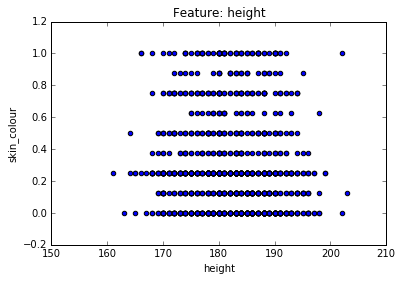

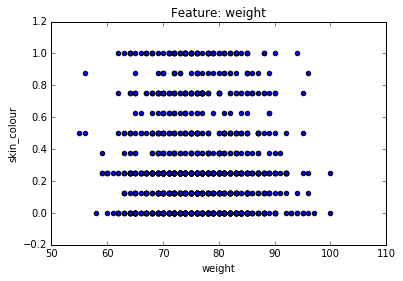

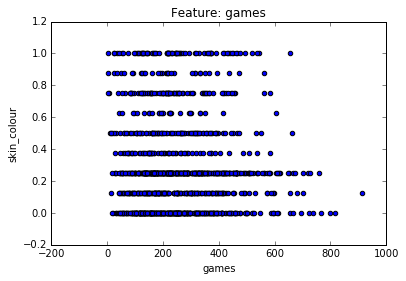

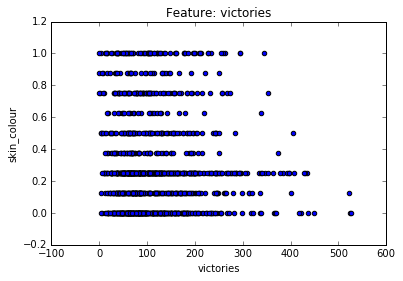

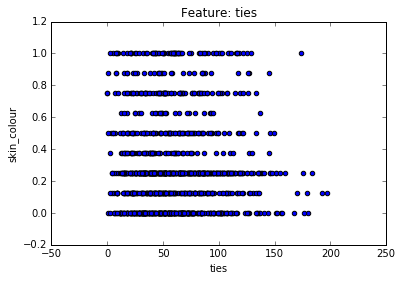

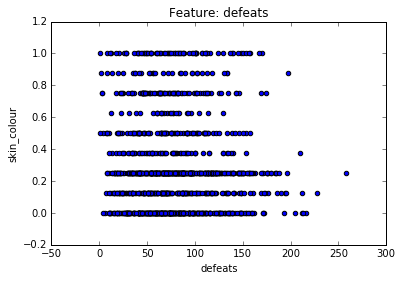

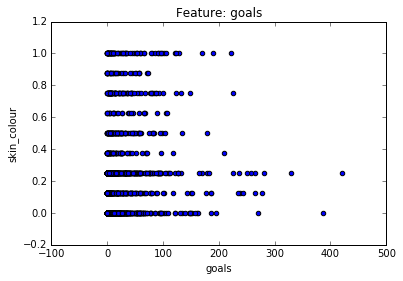

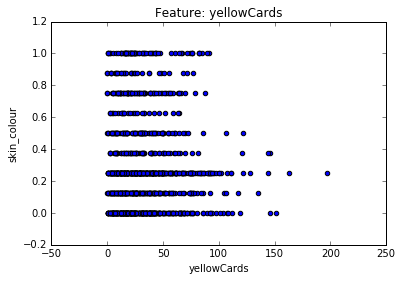

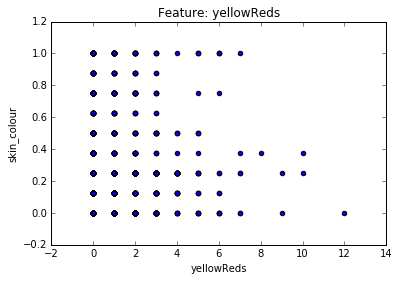

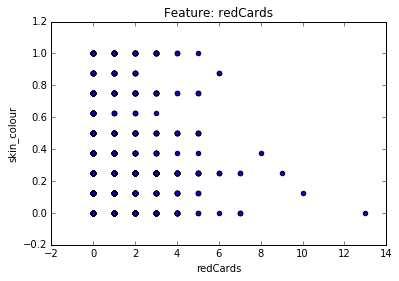

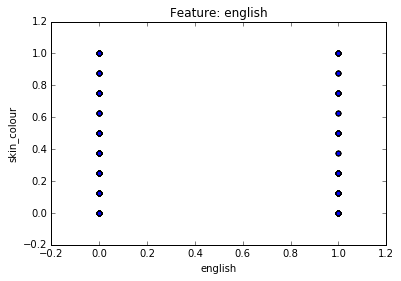

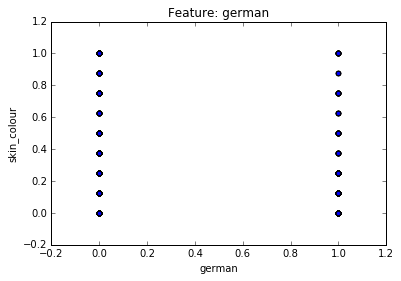

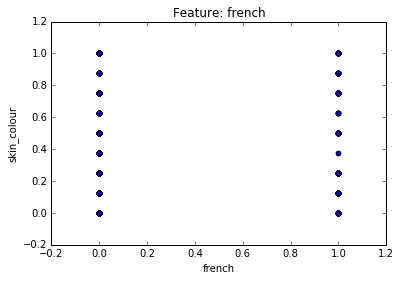

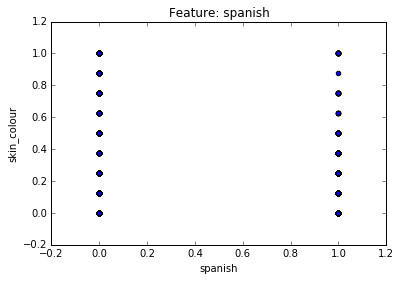

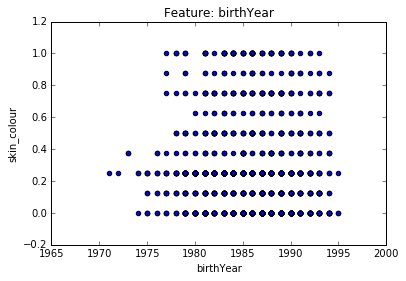

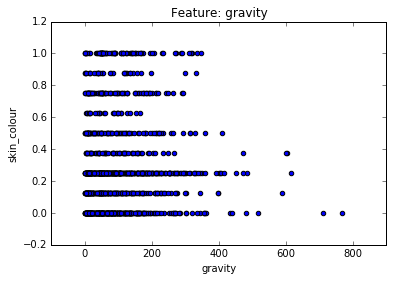

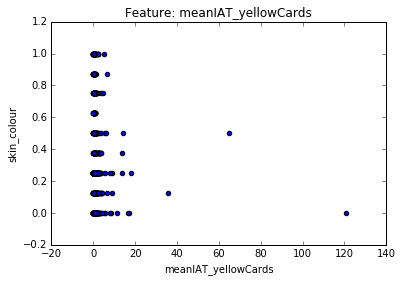

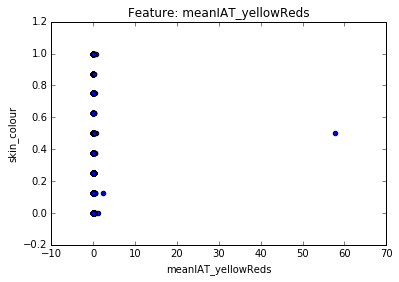

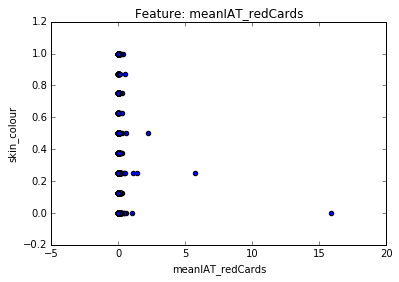

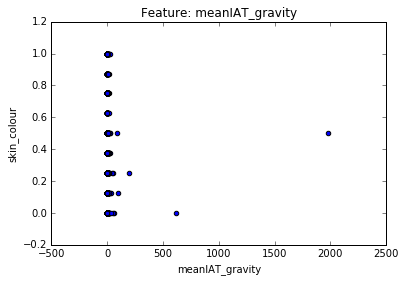

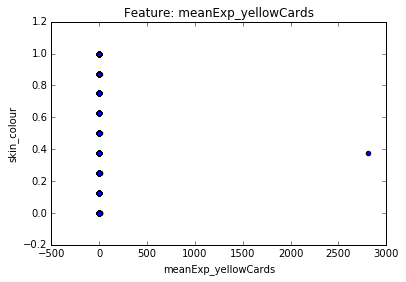

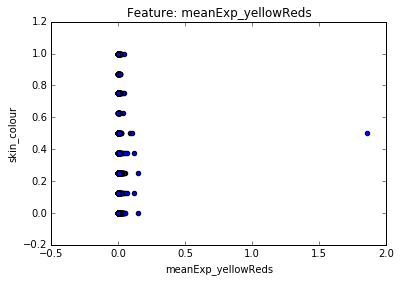

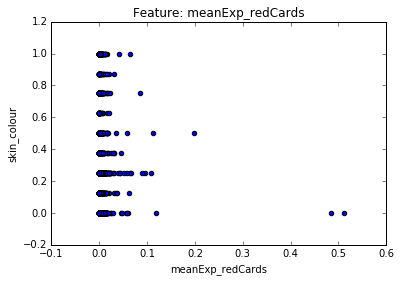

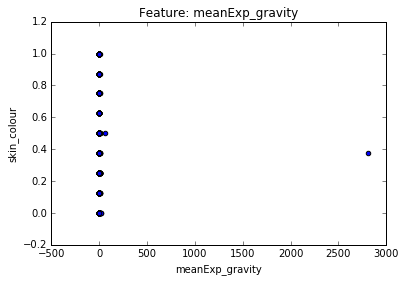

In [45]:
for ftre in features:
    if ftre not in non_numeric:
        plt.figure()
        plt.scatter(list(df_players_with_features_no_nan[ftre]), list(df_players_with_features_no_nan[label]))
        plt.title('Feature: %s'%(ftre))
        plt.xlabel(ftre)
        plt.ylabel(label)
        plt.show()

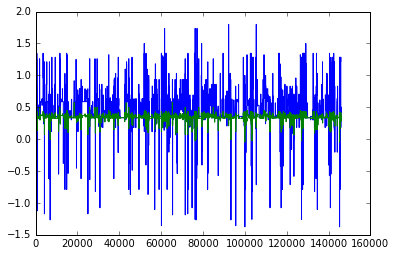

In [39]:
# Just plot the values of meanExp because some values are less than 0
plt.figure()
plt.plot(df['meanExp'],color='b')
plt.plot(df['meanIAT'],color='g')

Plotting the data that are available did not seem to exhibit any obvious characteristic that would be correlated to the skin colour of a player. We will see whether our machine learning algorithm will be able to find a good classification.